<a href="https://colab.research.google.com/github/SukhmanpreetKaurManes/Eda_basics/blob/main/practise_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importing the required libraries for EDA**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#ensures that Matplotlib plots appear directly inside the notebook cells
sns.set(color_codes=True)
 #Seaborn will recognize Matplotlib color abbreviations
 #and apply the Seaborn theme to them


**2. Loading the data into the data frame**.

In [5]:
df=pd.read_csv('/content/data.csv')
df.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [6]:
df.tail(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995



**3. Checking the types of data**

In [8]:
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


**4.Dropping irrelevant columns**

In [9]:
pd.unique(df['Vehicle Style'])        #pandas have unique function

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [10]:
df=df.drop(['Engine Fuel Type','Vehicle Style','Popularity'],axis=1)
df.head(2)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,28,19,40650


**5. Renaming the columns**

In [11]:
df=df.rename(columns={"Engine HP":"HP","Engine Cylinders":"Cylinders","Transmission Type":"Transmission","Driven_Wheels":"Drive"})
df.head(2)

,Make,Model,Year,HP,Cylinders,Transmission,Drive,Number of Doors,Market Category,Vehicle Size,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,28,19,40650


**6. Dropping the duplicate rows**

In [12]:
df.shape

(11914, 13)

In [13]:
dupicate_rows=df[df.duplicated()]
print("number of duplicate rows:",dupicate_rows.shape)

number of duplicate rows: (775, 13)


In [14]:
df.count()

,0
Make,11914
Model,11914
Year,11914
HP,11845
Cylinders,11884
Transmission,11914
Drive,11914
Number of Doors,11908
Market Category,8172
Vehicle Size,11914


In [15]:
df=df.drop_duplicates()
df.head(2)

,Make,Model,Year,HP,Cylinders,Transmission,Drive,Number of Doors,Market Category,Vehicle Size,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,28,19,40650


In [16]:
df.count()

,0
Make,11139
Model,11139
Year,11139
HP,11070
Cylinders,11109
Transmission,11139
Drive,11139
Number of Doors,11133
Market Category,7792
Vehicle Size,11139


**7. Dropping the missing or null values.**

In [17]:
print(df.isnull().sum())

Make                  0
Model                 0
Year                  0
HP                   69
Cylinders            30
Transmission          0
Drive                 0
Number of Doors       6
Market Category    3347
Vehicle Size          0
highway MPG           0
city mpg              0
MSRP                  0
dtype: int64


In [18]:
df=df.dropna()
df.count()

,0
Make,7704
Model,7704
Year,7704
HP,7704
Cylinders,7704
Transmission,7704
Drive,7704
Number of Doors,7704
Market Category,7704
Vehicle Size,7704


In [19]:
print(df.isnull().sum())

Make               0
Model              0
Year               0
HP                 0
Cylinders          0
Transmission       0
Drive              0
Number of Doors    0
Market Category    0
Vehicle Size       0
highway MPG        0
city mpg           0
MSRP               0
dtype: int64


**8. Detecting Outliers**

<Axes: xlabel='HP'>

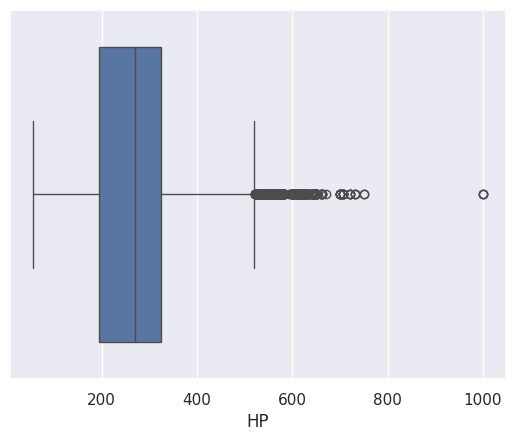

In [20]:
sns.boxplot(x=df['HP'])

**9. Plot different features against one another**

**Histogram**

Text(0.5, 0, 'Make')

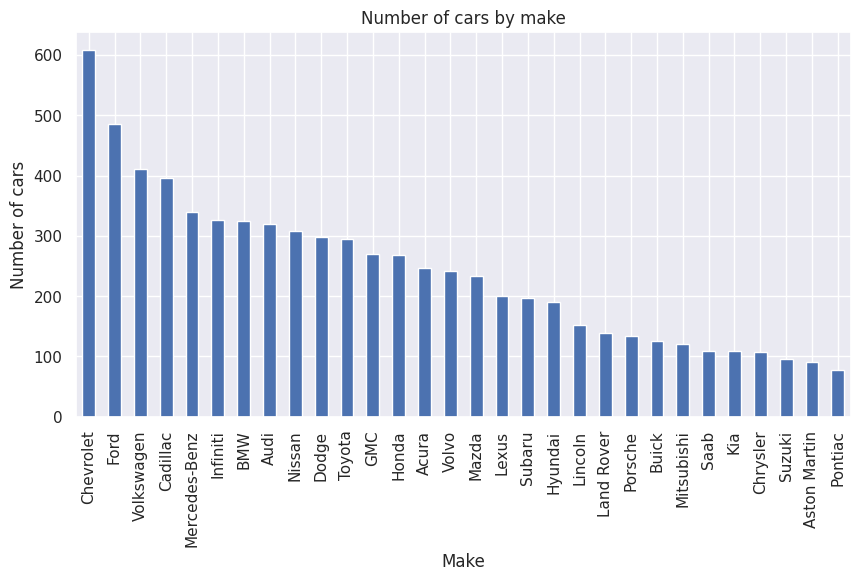

In [27]:
df.Make.value_counts().nlargest(30).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make')

<Axes: xlabel='Year', ylabel='Count'>

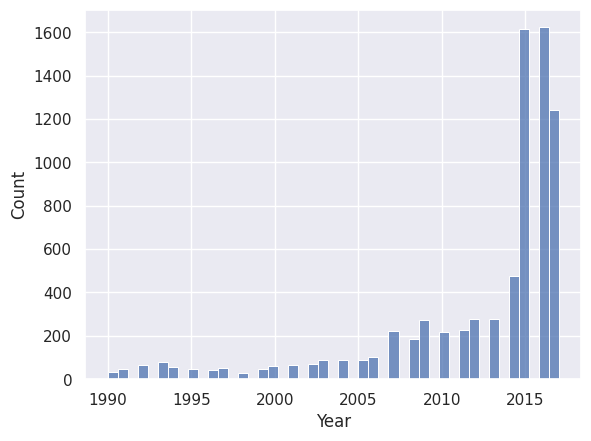

In [31]:
#plt.figure(figsize=(10,6))
sns.histplot(df['Year'])

**Scatterplot**

<Axes: xlabel='HP', ylabel='MSRP'>

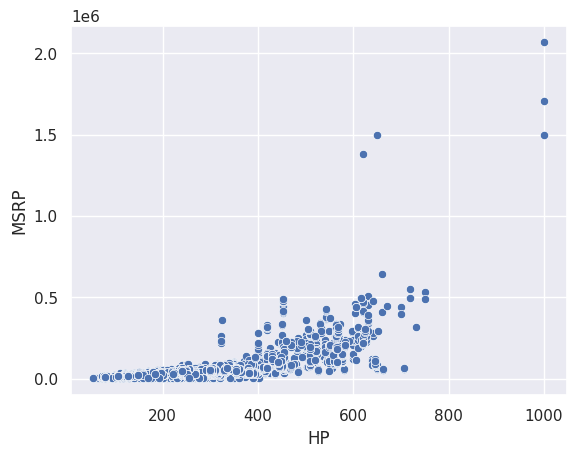

In [34]:
sns.scatterplot(x=df['HP'],y=df['MSRP'])

<Axes: xlabel='HP', ylabel='MSRP'>

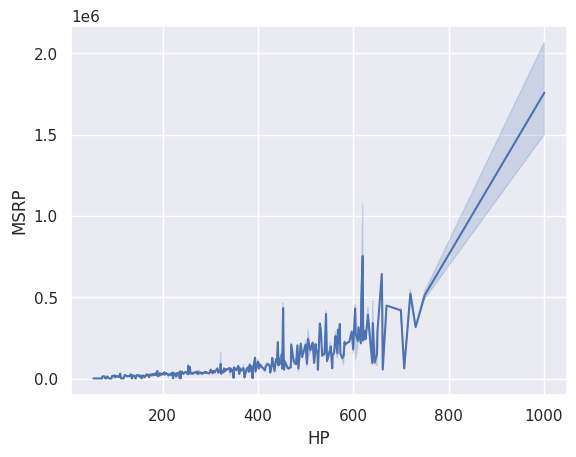

In [35]:
sns.lineplot(x=df['HP'],y=df['MSRP'])

<Axes: >

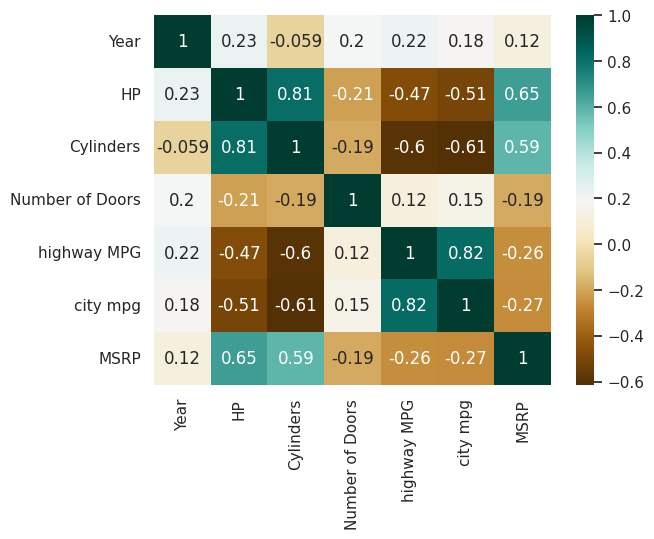

In [36]:
c=df.corr(numeric_only=True)
sns.heatmap(c,cmap='BrBG',annot=True)